In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing

## **Loading the Dataset**
First we load the dataset and find out the number of columns, rows, NULL values, etc.

In [3]:
df = pd.read_csv('uber.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.678200e+04,26782.000000,26782.000000,26782.000000,26782.000000,26782.000000,26781.000000
mean,2.762623e+07,11.408959,-72.562221,39.940947,-72.552649,39.942696,1.674695
std,1.602258e+07,10.134094,11.126212,6.065942,10.274646,6.060997,1.294758
min,4.800000e+01,0.000000,-748.016667,-74.015515,-75.350437,-74.008745,0.000000
25%,1.371681e+07,6.000000,-73.992071,40.734930,-73.991518,40.733806,1.000000
50%,2.748394e+07,8.500000,-73.981849,40.752453,-73.980202,40.752927,1.000000
75%,4.145050e+07,12.900000,-73.967331,40.767125,-73.963433,40.768172,2.000000
max,5.542169e+07,350.000000,40.770667,45.031653,40.828377,45.031598,6.000000


## **Cleaning**

In [6]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [7]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64

#### Remove null rows

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

#### Fix data type of `pickup_datetime` from `Object` to `DateTime`

In [10]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce') 

#### Separating the date and time into separate columns for more usability.

In [11]:
df= df.assign(
    second = df.pickup_datetime.dt.second,
    minute = df.pickup_datetime.dt.minute,
    hour = df.pickup_datetime.dt.hour,
    day= df.pickup_datetime.dt.day,
    month = df.pickup_datetime.dt.month,
    year = df.pickup_datetime.dt.year,
    dayofweek = df.pickup_datetime.dt.dayofweek
)
df = df.drop('pickup_datetime',axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26781 entries, 0 to 26780
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        26781 non-null  float64
 1   pickup_longitude   26781 non-null  float64
 2   pickup_latitude    26781 non-null  float64
 3   dropoff_longitude  26781 non-null  float64
 4   dropoff_latitude   26781 non-null  float64
 5   passenger_count    26781 non-null  float64
 6   second             26781 non-null  int64  
 7   minute             26781 non-null  int64  
 8   hour               26781 non-null  int64  
 9   day                26781 non-null  int64  
 10  month              26781 non-null  int64  
 11  year               26781 non-null  int64  
 12  dayofweek          26781 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 2.9 MB


In [13]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,6,52,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,56,4,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0,45,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,21,22,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,0,47,17,28,8,2014,3


## **Haversine Formula**
Calculatin the distance between the pickup and drop co-ordinates using the Haversine formual for accuracy.

![](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-7b7d66229e4a0b6c7bbf52b95a807dc4_l3.svg)

In [14]:
incorrect_coordinates = df.loc[
    (df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
    (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
    (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
    (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
]

df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [15]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    long1, lati1, long2, lati2 = map(np.radians, [longitude1, latitude1, longitude2, latitude2])
    dist_long = long2 - long1
    dist_lati = lati2 - lati1
    a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) * 6371
    # long1,lati1,long2,lati2 = longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]
    # c = sqrt((long2 - long1) ** 2 + (lati2 - lati1) ** 2)asin 
       
    return c

In [16]:
df['Distance'] = distance_transform(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude']
)

In [17]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,6,52,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,56,4,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0,45,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,21,22,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,0,47,17,28,8,2014,3,4.475450


## **Outliers**
We can get rid of the trips with very large distances that are outliers as well as trips with 0 distance.

Text(0, 0.5, 'fare_amount')

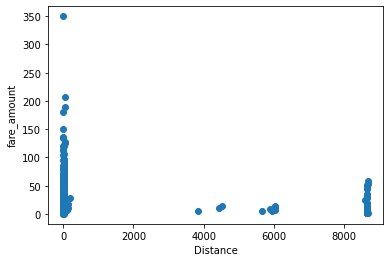

In [18]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

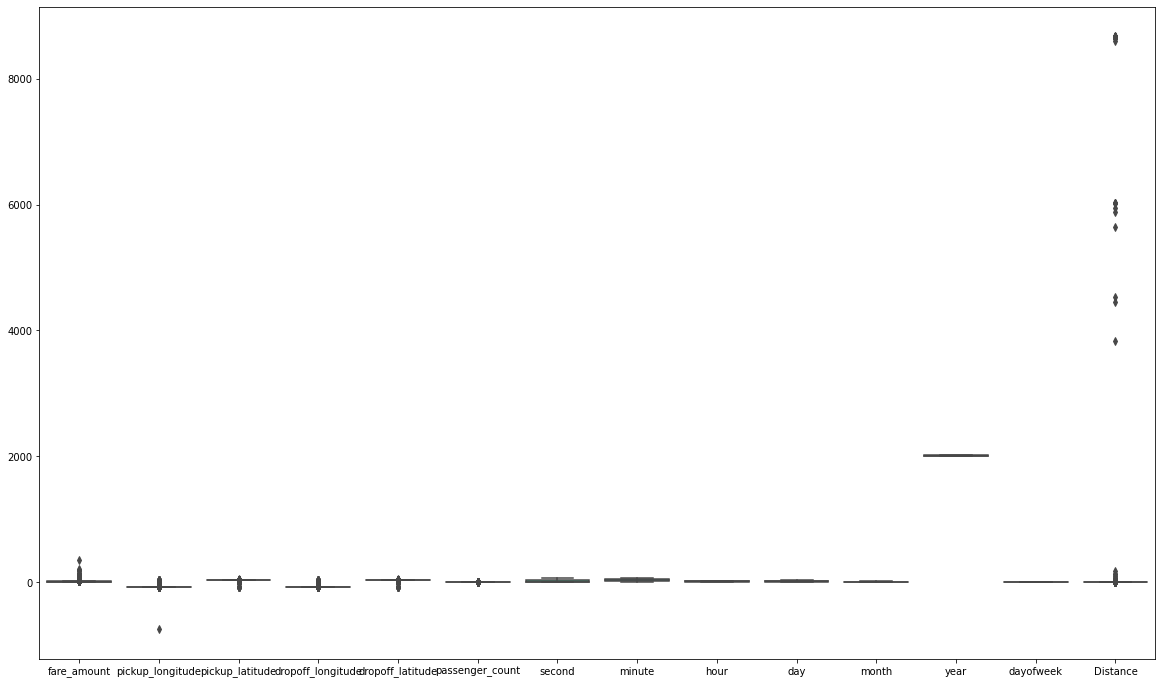

In [19]:
plt.figure(figsize=(20,12))
sns.boxplot(data = df)

In [20]:
df.drop(df[df['Distance'] >= 60].index, inplace = True)
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)

df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )

Text(0, 0.5, 'fare_amount')

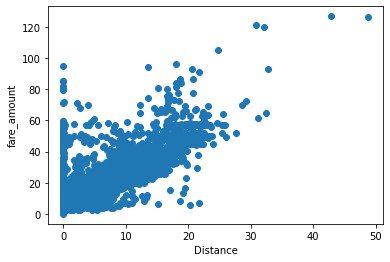

In [22]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

## **Coorelation Matrix**
To find the two variables that have the most inter-dependence

In [23]:
corr = df.corr()

corr.style.background_gradient(cmap='BuGn')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,Distance
fare_amount,1.000000,0.016785,-0.016206,0.016468,-0.016125,0.012016,-0.008970,-0.011724,-0.004589,0.008056,0.026231,0.122949,0.007646,0.857337
pickup_longitude,0.016785,1.000000,-0.981454,0.999992,-0.981443,0.001379,-0.014566,0.005774,-0.003872,0.008173,-0.014232,-0.001667,-0.009599,-0.115040
pickup_latitude,-0.016206,-0.981454,1.000000,-0.981460,0.999986,-0.003975,0.017265,-0.005060,0.006488,-0.011870,0.014919,-0.001606,0.006924,0.106758
dropoff_longitude,0.016468,0.999992,-0.981460,1.000000,-0.981449,0.001354,-0.014490,0.005777,-0.004139,0.008208,-0.014203,-0.001639,-0.009520,-0.115218
dropoff_latitude,-0.016125,-0.981443,0.999986,-0.981449,1.000000,-0.003957,0.017234,-0.005024,0.006468,-0.011865,0.014924,-0.001577,0.006937,0.107019
passenger_count,0.012016,0.001379,-0.003975,0.001354,-0.003957,1.000000,-0.214002,0.008221,0.020723,0.005223,0.008693,0.005511,0.031805,0.012539
second,-0.008970,-0.014566,0.017265,-0.014490,0.017234,-0.214002,1.000000,-0.008126,-0.014984,-0.001138,-0.055339,0.082390,-0.002263,-0.010917
minute,-0.011724,0.005774,-0.005060,0.005777,-0.005024,0.008221,-0.008126,1.000000,0.005377,-0.005531,0.000560,-0.003664,-0.013352,-0.012482
hour,-0.004589,-0.003872,0.006488,-0.004139,0.006468,0.020723,-0.014984,0.005377,1.000000,0.002842,-0.004775,0.001347,-0.093295,-0.019015
day,0.008056,0.008173,-0.011870,0.008208,-0.011865,0.005223,-0.001138,-0.005531,0.002842,1.000000,-0.019718,-0.011699,0.000274,0.005018


# **Standardization**
For more accurate results on our linear regression model

In [24]:
X = df['Distance'].values.reshape(-1, 1)        #Independent Variable
y = df['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

In [25]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.40231172]
 [-0.38135516]
 [ 0.16351526]
 ...
 [-0.50709449]
 [-0.25561583]
 [ 0.12160215]]
[[-0.43880574]
 [-0.22248919]
 [ 0.49797843]
 ...
 [-0.43534055]
 [ 0.06576559]
 [ 0.17583157]]


# **Splitting the Dataset**
Training and Test Set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

# **Simple Linear Regression**
Training the simple linear regression model on the training set

In [27]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.74
Test set score: 0.7217841


In [28]:
y_pred = l_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result[['Predicted']] = y_pred

result.sample(10)

,Actual,Predicted
4657,-0.454703,-0.441465
5121,-0.140355,-0.340238
5077,-0.171790,-0.501728
1810,-0.213703,0.125994
3813,-0.245138,-0.318979
1298,-0.255616,-0.007589
2865,0.645516,-0.209159
2934,-0.758573,-0.623632
3759,-0.559486,-0.358962
4040,0.247341,0.278026


In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 0.26667563575433934
Mean Absolute % Error: 1.6823126362392071
Mean Squared Error: 0.26092819713058696
Root Mean Squared Error: 0.5108113126493842
R Squared (R²): 0.8495787688762128


#### **Visualization**

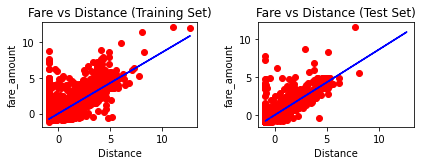

In [30]:
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")

plt.tight_layout()
plt.show()

In [31]:
cols = ['Model', 'RMSE', 'R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_metrics = pd.DataFrame([[
     "Linear Regresion model",
     np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
     np.sqrt(metrics.r2_score(y_test, y_pred))
]], columns = cols)

result_tabulation = pd.concat([result_tabulation, linreg_metrics], ignore_index=True)

result_tabulation

,Model,RMSE,R-Squared
0,Linear Regresion model,0.510811,0.849579


# **RandomForestRegressor**
Training the RandomForestRegressor model on the training set

In [32]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(random_state=10)

In [33]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result['Predicted'] = y_pred_RF

result.sample(10)

,Actual,Predicted
2017,-0.402312,-0.312722
1505,-0.559486,-0.464134
3489,-0.454703,-0.454179
1593,-0.507094,0.454287
5149,3.527042,-0.740236
1177,-0.559486,-0.409961
5339,1.798127,1.807295
4469,-0.255616,-0.287575
4610,0.331168,0.241893
1683,-0.381355,-0.165712


In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RF))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred_RF)))

Mean Absolute Error: 0.30408185273769867
Mean Absolute % Error: 1.7685896335072506
Mean Squared Error: 0.29527404240119237
Root Mean Squared Error: 0.5433912424774551
R Squared (R²): 0.8277455319854606


#### **Visualization**

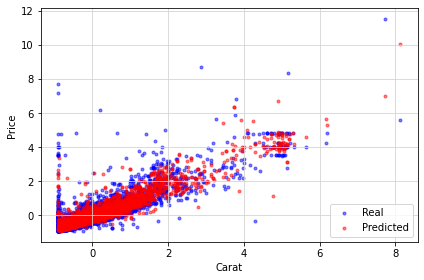

In [35]:
# Build scatterplot
plt.scatter(X_test, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(X_test, y_pred_RF, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')


plt.tight_layout()
plt.show()

In [36]:
# compile the required information
random_forest_metrics = pd.DataFrame([[
     "Random Forest Regressor model",
     np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)),
     np.sqrt(metrics.r2_score(y_test, y_pred_RF))
]], columns = cols)

result_tabulation = pd.concat([result_tabulation, random_forest_metrics], ignore_index=True)

result_tabulation

,Model,RMSE,R-Squared
0,Linear Regresion model,0.510811,0.849579
1,Random Forest Regressor model,0.543391,0.827746
